# Crie um arquivo Jupyter Notebook e realize as seguintes operações:
## a. Ler o dataset fakeTelegram.BR_2022.csv

In [25]:
import duckdb

conn = duckdb.connect()

telegram_data = conn.read_csv("../data/fakeTelegram.BR_2022.csv")

query = """
    SELECT * FROM telegram_data
"""

df = conn.execute(query).fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [26]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,None,None,None,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,None,None
1,2022-10-05 06:25:08,None,12283e08a2eb5789201e105b34489ee7,None,None,None,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,None,None
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,None,None,None,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,None,None
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,None,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,None,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,None,True,False,False,None,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,None,5ad5c8bbe9da93a37fecf3e5aa5b0637


In [27]:
df.shape

(557586, 19)

## b. Remova os trava-zaps.

In [28]:
df = conn.execute(f"""
    SELECT * 
    FROM telegram_data
    WHERE trava_zap IS NOT TRUE
""").fetch_df()

In [29]:
df.shape

(557570, 19)

## c. Remover as linhas repetidas (duplicadas).

In [30]:
df_ = conn.execute("SELECT DISTINCT * FROM df").fetch_df()

## d. Remover textos com menos de 5 palavras.

In [31]:
query = """
SELECT *
FROM df_
WHERE array_length(string_split(text_content_anonymous, ' ')) >= 5
"""

df = conn.execute(query).fetch_df()

In [8]:
!pip install sqlalchemy psycopg2-binary python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.5 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.6/580.6 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [sqlalchemy] 3/4 [sqlalchemy]


# Utilizando o PostgreSQL e o Metabase faça as seguintes operações:
## a. Crie dashboards para apresentar:

In [32]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()

DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWD')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')

DATABASE_URL = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

engine = create_engine(DATABASE_URL)

table_name = 'mytable'

try:
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f"DataFrame inserido com sucesso na tabela '{table_name}'.")
except Exception as e:
    print(f"Erro ao inserir o DataFrame: {e}")
finally:
    engine.dispose()

DataFrame inserido com sucesso na tabela 'mytable'.


# A partir daqui, a maioria das questões serão exibidas no navegador, através do Dashboard do Metabase. Logo, conferir vídeo de apresentação cujo link está no arquivo de texto enviado na atividade.

### 1. As quantidades de grupos, usuários e mensagens;
### 2. A quantidade de mensagens que possuem apenas texto X mídia;
### 3. Quantidade de mensagens por tipo de mídia (jpg, mp4 etc);
### 4. A relação entre a quantidade de mensagens e a quantidade de palavras presente nas mensagens;
### 10. As 30 URLs que mais se repetem (mais compartilhadas);
### 11. Os 30 domínios que mais se repetem (mais compartilhados);
### 12. Os 30 usuários mais ativos;
### 13. Relação entre quantidade de mensagens contendo somente texto e mensagens com tendo mídia dos usuários mais ativos
### 14. Os 30 usuários que mais compartilharam texto;
### 15. Os 30 usuários que mais compartilharam mídias;
### 16. As 30 mensagens mais compartilhadas;
### 17. As 30 mensagens mais compartilhadas em grupos diferentes;
### 18. Mensagens idênticas compartilhadas pelo mesmo usuário (e suas quantidades);
### 19. Mensagens idênticas compartilhadas pelo mesmo usuário em grupos distintos (e suas quantidades);

### 20. Os 30 unigramas, bigramas e trigramas mais compartilhados (após a remoção de stop words);

In [9]:
import pandas as pd

df_ = pd.read_csv("../data/__20__os_30_unigramas__bigramas_e_trigramas_mais_compartilhados__apos_a_remocao_de_stop_words___2025-05-24T11_52_02.287820893-03_00.csv")

In [11]:
df_.head()

,mensagem
0,olá juarez (-) \n\nseja bem vindo(a) ao grupo ...
1,ao vivo: na hora da virada surge o “guia práti...
2,https://revistaoeste.com/brasil/tse-impede-gov...
3,bonde do bolsonaro: apoios trarão a virada? co...
4,"assista a ""outubro vermelho - as emoções no li..."


In [16]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

nltk.download("stopwords")

mensagens = df_['mensagem'].dropna().astype(str)

stop_words = stopwords.words('portuguese')

vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words=stop_words)
X = vectorizer.fit_transform(mensagens)

sum_words = X.sum(axis=0)
ngrams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)

unigramas = [(w, f) for w, f in ngrams_freq if len(w.split()) == 1][:30]
bigramas  = [(w, f) for w, f in ngrams_freq if len(w.split()) == 2][:30]
trigramas = [(w, f) for w, f in ngrams_freq if len(w.split()) == 3][:30]

df_unigramas = pd.DataFrame(unigramas, columns=['Unigrama', 'Frequência'])
df_bigramas = pd.DataFrame(bigramas, columns=['Bigrama', 'Frequência'])
df_trigramas = pd.DataFrame(trigramas, columns=['Trigrama', 'Frequência'])

print("Top 30 Unigramas:\n", df_unigramas)
print("\nTop 30 Bigramas:\n", df_bigramas)
print("\nTop 30 Trigramas:\n", df_trigramas)


[nltk_data] Downloading package stopwords to /home/joaop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 30 Unigramas:
       Unigrama  Frequência
0        https       91647
1    bolsonaro       75624
2         user       67335
3         lula       52008
4           13       51191
5       brasil       50605
6        grupo       42611
7   presidente       41046
8        todos       35590
9          the       33979
10         pra       32105
11         tse       31523
12         vai       29720
13        aqui       29644
14        povo       28176
15        this       27857
16       agora       27078
17        deus       27041
18        pode       26809
19    telegram       25535
20       vamos       25452
21       sobre       25175
22          of       25025
23        2022       23639
24          br       23369
25          in       23337
26          10       22773
27       canal       22434
28      brazil       21875
29         www       21736

Top 30 Bigramas:
                 Bigrama  Frequência
0                 13 13       42681
1             https www       20552
2                

### 21. As 30 mensagens mais positivas (distintas);
### 22. As 30 mensagens mais negativas (distintas);
### 23. O usuário mais otimista;
### 24. O usuário mais pessimista;
### 25. As 30 maiores mensagens;
### 26. As 30 menores mensagens;
### 27. O dia em que foi publicado a maior quantidade de mensagens;
### 28. As mensagens que possuem as palavras “INTERVENÇÃO” e “MILITAR”;
### 29. Quantidade de mensagens por dia e hora;
### 30. Quantidade de mensagens por hora;

### 31. A nuvem de palavras referente às mensagens de texto (após a remoção de stop words);

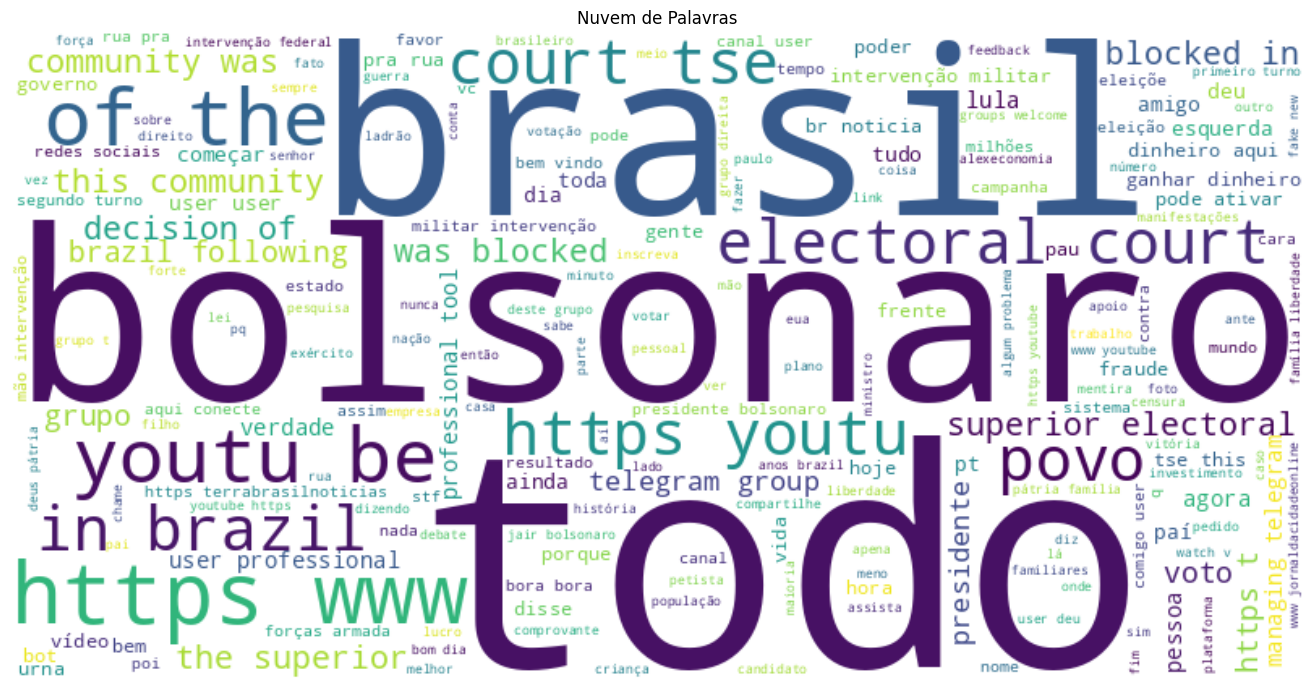

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv("../data/__20__os_30_unigramas__bigramas_e_trigramas_mais_compartilhados__apos_a_remocao_de_stop_words___2025-05-24T11_52_02.287820893-03_00.csv")

mensagens = df['mensagem'].dropna().astype(str)

texto_completo = ' '.join(mensagens)

stop_words = set(stopwords.words('portuguese'))
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    colormap='viridis'
).generate(texto_completo)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras")
plt.tight_layout()
plt.show()


### 32. A rede interativa das palavras referente às mensagens de texto (após a remoção de stop words);

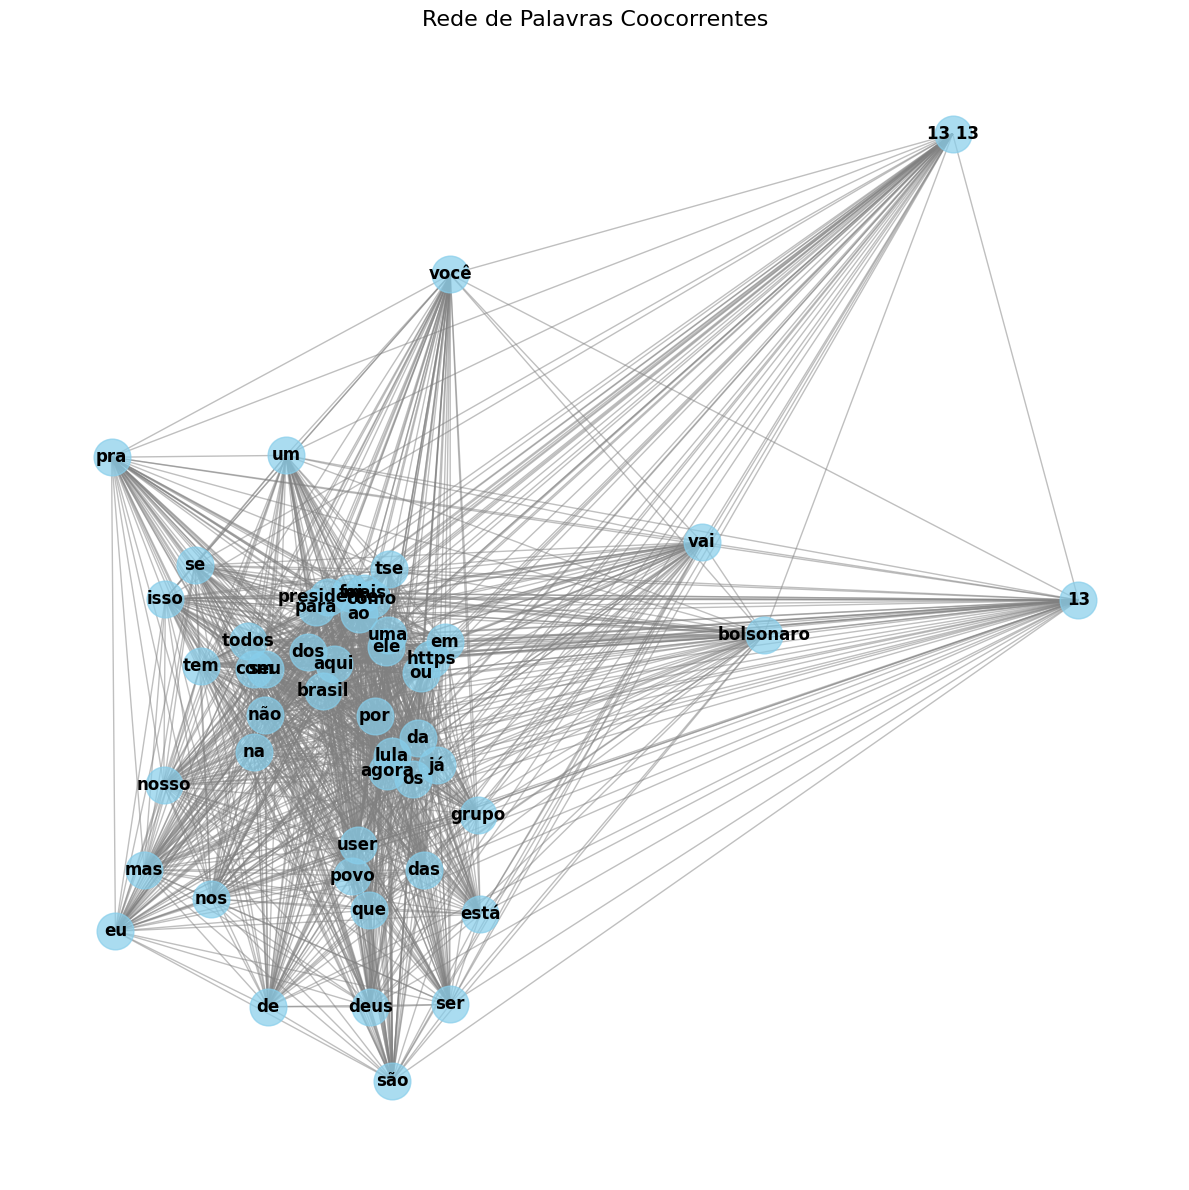

In [24]:
import networkx as nx

vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2), max_features=50)
X = vectorizer.fit_transform(df['mensagem'].astype(str))

vocab = vectorizer.get_feature_names_out()
cooccurrences = X.T * X

G = nx.Graph()

for i in range(len(vocab)):
    G.add_node(vocab[i], size=10)

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        weight = cooccurrences[i, j]
        if weight > 0:
            G.add_edge(vocab[i], vocab[j], weight=weight)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)

nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_weight='bold')

plt.title("Rede de Palavras Coocorrentes", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


### 33. Proporção de mensagens com e sem URL;
### 34. Proporção de desinformação;
### 35. Proporção de mensagens contendo mídia e desinformação;
### 36. Distribuição de mensagens por score de desinformação;
### 37. Proporção de sentimentos;
### 38. Distribuição de mensagens por score de sentimentos;
### 39. Proporção entre mensagens virais e não virais;
### 40. Algo que você julga importante e que ainda não foi solicitado;